In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit.Chem import AllChem

# Make the splits for task 1 (protein extrapolation)

In [2]:
swissprot = pd.read_csv('../processed_data/protein2EC.csv')
swissprot['Promiscuous'] = swissprot['Sequence'].duplicated(keep=False)
swissprot

,Entry,Entry Name,Sequence,EC number,Length,clusterRes50,clusterRes30,Promiscuous
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269,A0A009IHW8,A1AY86,False
1,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248,A0A024SC78,A0A024SC78,False
2,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471,G4MM92,G4MM92,False
3,A0A059TC02,CCR1_PETHY,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...,1.2.1.44,333,Q9S9N9,P14721,False
4,A0A068J840,UGT1_PANGI,MKSELIFLPAPAIGHLVGMVEMAKLFISRHENLSVTVLIAKFYMDT...,2.4.1.363,475,Q2V6K0,Q40287,False
...,...,...,...,...,...,...,...,...
149783,P36352,POLR_PHMV,VIVGTPPISPNWPAIKDLLHLKFKTEITSSPLFCGYYLSPAGCIRN...,2.7.7.48,178,P36352,P36352,False
149784,P39262,VG56_BPT4,MAHFNECAHLIEGVDKAQNEYWDILGDEKDPLQVMLDMQRFLQIRL...,3.6.1.12,171,Q94MV8,Q94MV8,False
149785,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240,Q05115,Q05115,False
149786,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172,Q94MV8,Q94MV8,False


### Splits with low sequence identity

In [3]:
not_promiscuous = swissprot[~swissprot['Promiscuous']]

At 30% identity clustering (low seuqence identity)

In [4]:
isolated30 = not_promiscuous[not_promiscuous['clusterRes30'].map(swissprot['clusterRes30'].value_counts()) == 1]
isolated30['EC3'] = isolated30['EC number'].str.split('.').str[:3].str.join('.')
isolated30

/tmp/ipykernel_1899732/3918235959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isolated30['EC3'] = isolated30['EC number'].str.split('.').str[:3].str.join('.')


,Entry,Entry Name,Sequence,EC number,Length,clusterRes50,clusterRes30,Promiscuous,EC3
7,A0A075BSX9,HLNO_SHIS7,MTEKIYDAIVVGAGFSGLVAARELSAQGRSVLIIEARHRLGGRTHV...,1.5.3.5,437,A0A075BSX9,A0A075BSX9,False,1.5.3
10,A0A0A1H8I4,AIS_PSESP,MFPRLPTLALGALLLASTPLLAAQPVTTLTVLSSGGIMGTIREVAP...,5.3.3.7,262,A0A0A1H8I4,A0A0A1H8I4,False,5.3.3
22,A0A0D1DWQ2,CMU1_USTMA,MKLSVSIFVLLAVSAFGGGSAAAVSGKSEAAEIEAGDRLDALRDQL...,5.4.99.5,290,A0A0D1DWQ2,A0A0D1DWQ2,False,5.4.99
33,A0A0F5HNH9,IMEF_BACTR,MKEELDAFHQIFTTTKEAIERFMAMLTPVIENAEDDHERLYYHHIY...,1.16.3.1,192,A0A0F5HNH9,A0A0F5HNH9,False,1.16.3
35,A0A0H2V8B5,TCPC_ECOL6,MIAYENIEFFICLVNVLGNNMYNILFFIFLSIAIPFLLFLAWKQHL...,3.2.2.6,307,A0A0H2V8B5,A0A0H2V8B5,False,3.2.2
...,...,...,...,...,...,...,...,...,...
149560,Q9YPD5,RDRP_MBVLF,MDSGLYPKTGAPTWFYGWSKQREGGFSDFGSEIFRLRALPPLKAEI...,2.7.7.48,420,Q9YPD5,Q9YPD5,False,2.7.7
149768,R1ENF4,ALMA5_EMIHU,MPAQAVVGTNSYLFRTVHAEVKGLRYLDVRAGKELSVSQKKALKEA...,4.4.1.3,504,R1ENF4,R1ENF4,False,4.4.1
149782,O55721,PARP_IIV6,MDNLKEEETNEINYIIDQLQKLNKKFKIYTVQRFKEEEPFNKYISE...,2.4.2.30,181,O55721,O55721,False,2.4.2
149783,P36352,POLR_PHMV,VIVGTPPISPNWPAIKDLLHLKFKTEITSSPLFCGYYLSPAGCIRN...,2.7.7.48,178,P36352,P36352,False,2.7.7


In [5]:
np.random.seed(42)
random.seed(42)
#sample a random one from each unique EC at level 3
isolated30 = isolated30.groupby('EC3').sample(1)
isolated30

,Entry,Entry Name,Sequence,EC number,Length,clusterRes50,clusterRes30,Promiscuous,EC3
761,G3XD23,WBPB_PSEAE,MKNFALIGAAGYIAPRHMRAIKDTGNCLVSAYDINDSVGIIDSISP...,1.1.1.335,316,G3XD23,G3XD23,False,1.1.1
17138,P29898,DHM2_PARDE,MKRILTLTVAALALGTPALAYDGTNCKAPGNCWEPKPDYPAKVEGS...,1.1.2.7,103,P29898,P29898,False,1.1.2
12318,A0A075HNX4,LCAO_UNCAR,MAQGAQRKNFGHNQILRPSAAYTPVDEQEVLQILDRHRGQRIRAVG...,1.1.3.20,479,A0A075HNX4,A0A075HNX4,False,1.1.3
129575,O32719,MQO_KLEPN,GTEVVVDQQKTISALLGASPGASTAAPITLNVLKQMFPQQFNSPEW...,1.1.5.4,115,O32719,O32719,False,1.1.5
3645,P20932,MDLB_PSEPU,MSQNLFNVEDYRKLRQKRLPKMVYDYLEGGAEDEYGVKHNRDVFQQ...,1.1.99.31,393,P20932,P20932,False,1.1.99
...,...,...,...,...,...,...,...,...,...
62721,O54029,MMDD_PROMO,MNITELMELFSNPETIKTLETGDLMTGIGVTVVLGMGITVVALIFL...,7.2.4.3,137,O54029,O54029,False,7.2.4
133435,Q0P887,TUPC_CAMJE,MIEISNLFFNYQNKEVLKIKNLKLDTSKISILMGANGSGKSTFLRI...,7.3.2.6,331,Q0P887,Q0P887,False,7.3.2
69388,P96313,SECA_CYTFI,KLAGMTGTAKTEEEEFRNIYGMDVMVIPTNKPIARIDKPDLIYKTM...,7.4.2.8,473,P96313,P96313,False,7.4.2
90262,Q5WCL2,TAGH_SHOC1,MNPKMILTGVSKKYTLYRNNTEKLKAMFFPKTREQHRDFYALKDIN...,7.5.2.4,360,Q5WCL2,Q5WCL2,False,7.5.2


At 50% sequence identity clustering (moderate sequence identity)

In [6]:
isolated50 = not_promiscuous[not_promiscuous['clusterRes50'].map(swissprot['clusterRes50'].value_counts()) == 1]
isolated50['EC3'] = isolated50['EC number'].str.split('.').str[:3].str.join('.')
isolated50

/tmp/ipykernel_1899732/1036468880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isolated50['EC3'] = isolated50['EC number'].str.split('.').str[:3].str.join('.')


,Entry,Entry Name,Sequence,EC number,Length,clusterRes50,clusterRes30,Promiscuous,EC3
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269,A0A009IHW8,A1AY86,False,3.2.2
5,A0A072UR65,CHT5B_MEDTR,MANILNLKHLLTLALILLALATKSSTSSSSSITRVKGIYWLENPFF...,3.2.1.14,379,A0A072UR65,A0A072UR65,False,3.2.1
7,A0A075BSX9,HLNO_SHIS7,MTEKIYDAIVVGAGFSGLVAARELSAQGRSVLIIEARHRLGGRTHV...,1.5.3.5,437,A0A075BSX9,A0A075BSX9,False,1.5.3
9,A0A096P8D3,IDH_OSTTA,MTRVERGRVLARAIERAVAHRASARRWTTTTRTPAWMVTGWMGGRG...,1.1.1.41,470,A0A096P8D3,P79089,False,1.1.1
10,A0A0A1H8I4,AIS_PSESP,MFPRLPTLALGALLLASTPLLAAQPVTTLTVLSSGGIMGTIREVAP...,5.3.3.7,262,A0A0A1H8I4,A0A0A1H8I4,False,5.3.3
...,...,...,...,...,...,...,...,...,...
149781,W6VBF4,MDDA_PSESZ,MNPPNRTGHRFFVFSGKLAGLLYSLCCYLFFLLTALYLIGFLAGIG...,2.1.1.334,260,W6VBF4,Q89V40,False,2.1.1
149782,O55721,PARP_IIV6,MDNLKEEETNEINYIIDQLQKLNKKFKIYTVQRFKEEEPFNKYISE...,2.4.2.30,181,O55721,O55721,False,2.4.2
149783,P36352,POLR_PHMV,VIVGTPPISPNWPAIKDLLHLKFKTEITSSPLFCGYYLSPAGCIRN...,2.7.7.48,178,P36352,P36352,False,2.7.7
149785,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240,Q05115,Q05115,False,4.1.1


In [7]:
np.random.seed(42)
random.seed(42)
#sample a random one from each unique EC at level 3
isolated50 = isolated50.groupby('EC3').sample(1)
isolated50

,Entry,Entry Name,Sequence,EC number,Length,clusterRes50,clusterRes30,Promiscuous,EC3
81150,Q38X88,AROE_LATSS,MISGYTALYGLIAHPAQHSLSPFIHNTGFHQIQMDARYAVFDSQAT...,1.1.1.25,290,Q38X88,Q32GE1,False,1.1.1
14454,B8MKR3,CYB2_TALSN,MARVLDAAEVAKHNTPESCWVILYGKVYDVTEFISSHPGGVKVILR...,1.1.2.3,496,B8MKR3,B8MKR3,False,1.1.2
12937,A3RXB7,HEXNO_RALSU,MTLDVSRQDPRYNTLKHGFNLRWPSTDAQAAGRIALCEKADDVAPA...,1.1.3.29,508,A3RXB7,A3RXB7,False,1.1.3
131342,P56954,MQO_CAMJE,MSQQEFDVLVIGAGISGAALFYELARYTNIKNIALIEKYNTAATLN...,1.1.5.4,448,P56954,O24913,False,1.1.5
18780,Q02550,ANSME_BACTN,MKATTYAPFAKPLYVMVKPVGAVCNLACEYCYYLEKANLYKENPKH...,1.1.98.7,414,Q02550,Q02550,False,1.1.98
...,...,...,...,...,...,...,...,...,...
110220,Q9ZAA8,GCDD_ACIFV,MTDNPWLIMMINMTIVFGVLIVLGILMVLIHAVDPTKKVQGKKKPV...,7.2.4.5,107,Q9ZAA8,Q56724,False,7.2.4
73073,Q0VQ44,MODC_ALCBS,MSLALSISGRRGAFQLQVDATLQPEGVTVLFGASGAGKSSLLRMVA...,7.3.2.5,358,Q0VQ44,Q21BF6,False,7.3.2
69388,P96313,SECA_CYTFI,KLAGMTGTAKTEEEEFRNIYGMDVMVIPTNKPIARIDKPDLIYKTM...,7.4.2.8,473,P96313,P96313,False,7.4.2
17229,P32721,ALSA_ECOLI,MATPYISMAGIGKSFGPVHALKSVNLTVYPGEIHALLGENGAGKST...,7.5.2.8,510,P32721,P77257,False,7.5.2


### Misclassified split from Price et al.

In [8]:
price = pd.read_csv('raw_data/price.tsv', sep='\t')
#remove sequences in price that are in swissprot
price = price[~price['Sequence'].isin(swissprot['Sequence'])]
price

,Entry,EC number,Sequence
0,WP_063460136,5.3.1.7,MAIPPYPDFRSAAFLRQHLRATMAFYDPVATDASGGQFHFFLDDGT...
1,WP_063462980,4.2.1.43,VPTTFHEDGTLDLDSQKRCLDFMIDAGVDGVCILANFSEQFSLSDA...
2,WP_063462990,1.1.1.48,LIDCNIDMTQLFAPSSSSTDATGAPQGLAKFPSLQGRAVFVTGGGS...
3,WP_041412631,4.2.1.25,MCLGRRRCHMNNKKPKTLRSASWFGSDDKNGFMYRSWMKNQGIPEH...
4,WP_011717048,5.1.3.3,MQLSVTQKSLQHAAFADELQLVTLTNSHGLEVVLSNYGASIWSVKL...
...,...,...,...
144,WP_010207013,1.3.8.7,MADYKAPLRDMRFVLNEVFEVATTWAQLPALADTVDAETVEAILEE...
145,WP_010207016,1.3.8.7,MPDYKAPLRDIRFVRDELLGYEAHYQSLPACQDATPDMVDAILEEG...
146,WP_010207340,2.6.1.19,MSSNNPQTREWQALSSDHHLAPFSDFKQLKEKGPRIITKAHGVYLW...
147,WP_010207341,6.3.1.11,MSVPPRAVQLNEANAFLKDHPEVLYVDLLIADMNGVVRGKRIERTS...


In [22]:
price.to_csv('../splits/task1/price_protein_test.csv', index=False)

BLAST these to check sequence identity to the training set

### Promsicuous Split

In [9]:
promiscuous = swissprot[swissprot['Promiscuous']]
promiscuous

,Entry,Entry Name,Sequence,EC number,Length,clusterRes50,clusterRes30,Promiscuous
14,A0A0A7GEY4,GGPPS_GEOAI,MISEIIKDRAKLVNEKIEELLKEQEPEGLYRAARHYLKAGGKRLRP...,2.5.1.1,319,Q8PW34,P9WKH1,True
15,A0A0A7GEY4,GGPPS_GEOAI,MISEIIKDRAKLVNEKIEELLKEQEPEGLYRAARHYLKAGGKRLRP...,2.5.1.10,319,Q8PW34,P9WKH1,True
16,A0A0A7GEY4,GGPPS_GEOAI,MISEIIKDRAKLVNEKIEELLKEQEPEGLYRAARHYLKAGGKRLRP...,2.5.1.29,319,Q8PW34,P9WKH1,True
24,A0A0E3D8M9,JANG_PENJA,MLYFLAETIFGFICQYVPIGFWNGYSPAPTDRYRRLDLKSSQGFRA...,2.5.1.1,364,Q9C446,A0A1U8QLG8,True
25,A0A0E3D8M9,JANG_PENJA,MLYFLAETIFGFICQYVPIGFWNGYSPAPTDRYRRLDLKSSQGFRA...,2.5.1.10,364,Q9C446,A0A1U8QLG8,True
...,...,...,...,...,...,...,...,...
149342,Q9UYY9,PORC_PYRAB,MIEIRFHGRGGQGAVTAANILAEAAFIEGKYVQAFPFFGVERRGAP...,1.2.7.7,185,O58411,O05650,True
149366,Q9V0Y5,MTAD_PYRAB,MVSLSVLLRGGLVLYGRDYKLTRADVLIEGDKIVEVKRNINKPADE...,3.5.4.28,425,Q9V0Y5,P72156,True
149367,Q9V0Y5,MTAD_PYRAB,MVSLSVLLRGGLVLYGRDYKLTRADVLIEGDKIVEVKRNINKPADE...,3.5.4.31,425,Q9V0Y5,P72156,True
149657,Q9ZEE1,PDRP_RICPR,MTKLIIHLVSDSSVQTAKHAANSALAQFTSIKQKLYHWPMIRNCEL...,2.7.11.32,273,C4K0B5,Q8GVP6,True


In [10]:
promiscuous['EC3'] = promiscuous['EC number'].str.split('.').str[:3].str.join('.')
unique_level3 = promiscuous['EC3'].unique()
len(unique_level3)

/tmp/ipykernel_1899732/1190340994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promiscuous['EC3'] = promiscuous['EC number'].str.split('.').str[:3].str.join('.')


120

<Axes: >

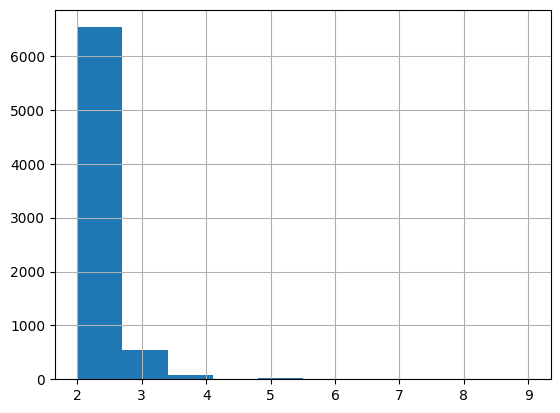

In [11]:
promiscuous['Sequence'].value_counts().hist()

In [12]:
promiscuous = promiscuous.groupby('Sequence').agg({'EC number': lambda x: list(x)}).reset_index()
promiscuous

,Sequence,EC number
0,AAAWMLNGCLQVMDSRTIPANRNADNVDPALQTATHLCFPTRPVRV...,"[1.1.1.100, 2.3.1.41, 2.3.1.86]"
1,AEVCYSHLGCFSDEKPWAGTSQRPIKSLPSDPKKINTRFLLYTNEN...,"[3.1.1.26, 3.1.1.3]"
2,AGTVGKVIKCKAAVAWEAGKPLCIEEIEVAPPKAHEVRIKIIATAV...,"[1.1.1.1, 1.1.1.284]"
3,AHNIVLYTGAKMPILGLGTWKSPPGKVTEAVKVAIDLGYRHIDCAH...,"[1.1.1.21, 1.1.1.300, 1.1.1.372, 1.1.1.54]"
4,AICACCKVLNSNEKASCFSNKTFKGLGNAGGLPWKCNSVDMKHFVS...,"[1.5.1.3, 2.1.1.45]"
...,...,...
7208,SSWWAHVEMGPPDPILGVTEAYKRDTNSKKMNLGVGAYRDDNGKPY...,"[2.6.1.1, 2.6.1.7]"
7209,TDATGKPIKCMAAIAWEAKKPLSIEEVEVAPPKSGEVRIKILHSGV...,"[1.1.1.1, 1.1.1.284]"
7210,VQNPGASAIQCRAAVLRKEGQPMKIEQVLIQAPGPNQVRVKMVSSG...,"[1.1.1.347, 1.1.1.354]"
7211,VVSAGLIAGDFVTVLQALPRSEHQVVAVAARDLRRAEEFARTHGIP...,"[1.1.1.179, 1.3.1.20]"


In [13]:
def get_difference_level(predicted_ECs):
    counters = []

    for true_EC in predicted_ECs:

        #convert true_EC to a list
        if type(predicted_ECs) == str:
            predicted_ECs = [predicted_ECs]
        true_split = true_EC.split('.')

        for predicted in predicted_ECs:
            #print(true_EC)
            
            predicted_split = predicted.split('.')
            counter = 0
            for predicted, true in zip(predicted_split, true_split):
                if predicted == true:
                    counter += 1
                else:
                    break
            counters.append(4 - counter)

    return np.max(counters)

In [14]:
promiscuous['Surprise Level'] = promiscuous['EC number'].apply(get_difference_level)
promiscuous['Number of ECs'] = promiscuous['EC number'].apply(lambda x: len(x))
promiscuous['Duplicated EC'] = promiscuous['EC number'].duplicated(keep=False)
promiscuous = promiscuous.sort_values(['Duplicated EC', 'Surprise Level', 'Number of ECs'], ascending=False)

In [15]:
promiscuous.drop_duplicates(subset='EC number', inplace=True)
promiscuous.reset_index(inplace=True)
promiscuous

,index,Sequence,EC number,Surprise Level,Number of ECs,Duplicated EC
0,350,MAGWSCLVTGAGGFVGQRIIKMLVQEKELQEVRALDKVFRPETKEE...,"[1.1.1.145, 1.1.1.210, 1.1.1.270, 5.3.3.1]",4,4,True
1,495,MALLRGVFIVAAKRTPFGAYGGLLKDFSATDLTEFAARAALSAGKV...,"[2.3.1.16, 2.3.1.9, 3.1.2.1, 3.1.2.2]",4,4,True
2,232,MAEAVLIDLFGLKLNSQKNCHQTLLKTLNAVQYHHAAKAKFLCIMC...,"[2.4.2.1, 2.4.2.28, 3.5.4.4]",4,3,True
3,433,MAKLTAVPLSALVDEPVHIQVTGLAPFQVVCLQASLKDEKGNLFSS...,"[2.3.1.65, 3.1.2.2, 3.1.2.27]",4,3,True
4,439,MAKQLQARRLDGIDYNPWVEFVKLASEHDVVNLGQGFPDFPPPDFA...,"[2.6.1.64, 2.6.1.7, 4.4.1.13]",4,3,True
...,...,...,...,...,...,...
726,7053,MVTVEEVRKAQRAEGPATVLAIGTATPPNCVGQSTYPDYYFRITNS...,"[2.3.1.212, 2.3.1.74]",1,2,False
727,7067,MVVRPNVKELPGPKAKEVIERNFKYLAMTTQDPENLPIVIERGEGI...,"[2.6.1.13, 2.6.1.36]",1,2,False
728,7076,MVYPRLLINLKEIEENARKVVEMASRRGIEIVGVTKVTLGDPRFAE...,"[5.1.1.12, 5.1.1.5]",1,2,False
729,7194,MYSLHDFKFPEDWIEPPANDKCIYTCYKEVVDFKLFEENKKTLEYY...,"[4.2.3.15, 4.2.3.47]",1,2,False


In [16]:
promiscuous = promiscuous[promiscuous['Surprise Level'] >= 2]
promiscuous = promiscuous[promiscuous['Duplicated EC']]
promiscuous

,index,Sequence,EC number,Surprise Level,Number of ECs,Duplicated EC
0,350,MAGWSCLVTGAGGFVGQRIIKMLVQEKELQEVRALDKVFRPETKEE...,"[1.1.1.145, 1.1.1.210, 1.1.1.270, 5.3.3.1]",4,4,True
1,495,MALLRGVFIVAAKRTPFGAYGGLLKDFSATDLTEFAARAALSAGKV...,"[2.3.1.16, 2.3.1.9, 3.1.2.1, 3.1.2.2]",4,4,True
2,232,MAEAVLIDLFGLKLNSQKNCHQTLLKTLNAVQYHHAAKAKFLCIMC...,"[2.4.2.1, 2.4.2.28, 3.5.4.4]",4,3,True
3,433,MAKLTAVPLSALVDEPVHIQVTGLAPFQVVCLQASLKDEKGNLFSS...,"[2.3.1.65, 3.1.2.2, 3.1.2.27]",4,3,True
4,439,MAKQLQARRLDGIDYNPWVEFVKLASEHDVVNLGQGFPDFPPPDFA...,"[2.6.1.64, 2.6.1.7, 4.4.1.13]",4,3,True
...,...,...,...,...,...,...
131,2179,MGNRAGRSDFEWVYTDQPHTQRRKEMLAKYPAIKALMRPDPYLKWT...,"[1.14.18.5, 1.14.19.17]",2,2,True
132,2515,MILPCESFNGVPSGCLIIEMNWYSVLKASTAIFFPEKYSSSTSSLS...,"[2.7.7.74, 2.7.8.34]",2,2,True
133,3648,MMILVTGGARSGKSRHAEALIGDAPQVLYIATSQILDDEMAARIQH...,"[2.7.1.156, 2.7.7.62]",2,2,True
134,4122,MPAASKNVVMIDNYDSFTWNLYEYLCQEGANVEVFRNDQITIPEIE...,"[4.1.1.48, 4.1.3.27]",2,2,True


BLAST these to check sequence identity to the training set

### Remove the sequences to get the train indices

In [17]:
test_pooled_seqs = pd.concat([isolated30, isolated50, price, promiscuous])['Sequence'].unique()
len(test_pooled_seqs)

650

In [18]:
#remove from the training set
train_swissprot = swissprot[~swissprot['Sequence'].isin(test_pooled_seqs)]
train_swissprot

,Entry,Entry Name,Sequence,EC number,Length,clusterRes50,clusterRes30,Promiscuous
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269,A0A009IHW8,A1AY86,False
1,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248,A0A024SC78,A0A024SC78,False
2,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471,G4MM92,G4MM92,False
3,A0A059TC02,CCR1_PETHY,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...,1.2.1.44,333,Q9S9N9,P14721,False
4,A0A068J840,UGT1_PANGI,MKSELIFLPAPAIGHLVGMVEMAKLFISRHENLSVTVLIAKFYMDT...,2.4.1.363,475,Q2V6K0,Q40287,False
...,...,...,...,...,...,...,...,...
149783,P36352,POLR_PHMV,VIVGTPPISPNWPAIKDLLHLKFKTEITSSPLFCGYYLSPAGCIRN...,2.7.7.48,178,P36352,P36352,False
149784,P39262,VG56_BPT4,MAHFNECAHLIEGVDKAQNEYWDILGDEKDPLQVMLDMQRFLQIRL...,3.6.1.12,171,Q94MV8,Q94MV8,False
149785,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240,Q05115,Q05115,False
149786,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172,Q94MV8,Q94MV8,False


In [20]:
#save indices of train_swissprot to txt
np.savetxt('../splits/task1/protein2EC_train_indices.txt', train_swissprot.index, fmt='%d')

# Make splits for task 2 (reaction extrapolation)

In [24]:
reaction2EC = pd.read_csv('../processed_data/reaction2EC.csv')
reaction2EC = reaction2EC.dropna(subset='Mapped Reaction') #remove rows with no mapped reaction for now
reaction2EC['Shared'] = reaction2EC['Reaction'].duplicated(keep=False)
reaction2EC

,Reaction,Mapped Reaction,EC number,Reaction Text,Shared
0,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r},True
1,CC(C)(C)OC(=O)N1CCC(=O)C1.NC(=O)C1=CN([C@@H]2O...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...,False
2,CC(C)(C)OC(=O)N1CC[C@H](O)C1.NC(=O)c1ccc[n+]([...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...,False
3,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,[H+].[NH2:1][C:2](=[O:3])[C:4]1=[CH:5][N:6]([C...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...,False
4,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...,False
...,...,...,...,...,...
53456,CC(C)=CCC/C(C)=C/CC/C(C)=C/COP(=O)(O)OP(=O)(O)...,[CH3:1][C:2]([CH3:3])=[CH:4][CH2:5][CH2:6]/[C:...,6.5.1.3,"ATP + (2E,6E)-farnesyl triphosphate = (2E,6E)-...",True
53457,Nc1ccn([C@@H]2O[C@H](COP(=O)(O)O[C@H]3[C@@H](O...,[NH2:1][c:2]1[cH:3][cH:4][n:5]([C@@H:6]2[O:7][...,6.5.1.3,"5'-adenylated cytidine 5',3'-bisphosphate + di...",False
53458,C=C(C)CCOP(=O)(O)OP(=O)(O)OP(=O)(O)O.Nc1ncnc2c...,[CH2:1]=[C:2]([CH3:3])[CH2:4][CH2:5][O:6][P:7]...,6.5.1.3,ATP + isopentenyl triphosphate = isopentenyl-t...,False
53459,N=c1[nH]c(=O)c2ncn([C@@H]3O[C@H](COP(=O)(O)OP(...,[NH2:56][c:57]1[cH:58][cH:59][n:60]([C@@H:61]2...,6.5.1.3,"5'-adenylated cytidine 5',3'-bisphosphate + di...",False


### Maybe include the ones that map to multiple ECs?

In [25]:
not_shared = reaction2EC[reaction2EC['Shared'] == False]
not_shared['Duplicated EC'] = not_shared['EC number'].duplicated(keep=False)
not_shared = not_shared[not_shared['Duplicated EC'] == True] #only keeps ECs with multiple example reactions
not_shared

/tmp/ipykernel_1218363/3598596558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_shared['Duplicated EC'] = not_shared['EC number'].duplicated(keep=False)


,Reaction,Mapped Reaction,EC number,Reaction Text,Shared,Duplicated EC
1,CC(C)(C)OC(=O)N1CCC(=O)C1.NC(=O)C1=CN([C@@H]2O...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...,False,True
2,CC(C)(C)OC(=O)N1CC[C@H](O)C1.NC(=O)c1ccc[n+]([...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...,False,True
3,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,[H+].[NH2:1][C:2](=[O:3])[C:4]1=[CH:5][N:6]([C...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...,False,True
4,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...,False,True
8,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,N-benzyl-4-piperidone + NADH + H+ = N-benzylpi...,False,True
...,...,...,...,...,...,...
53447,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8]...,6.5.1.1,"ATP + UTP = P1-(5'-adenosyl),P4-(5'-uridinyl)t...",False,True
53449,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8]...,6.5.1.3,"ATPgammaS + ATP = P1,P4-bis(5'-adenosyl) tetra...",False,True
53457,Nc1ccn([C@@H]2O[C@H](COP(=O)(O)O[C@H]3[C@@H](O...,[NH2:1][c:2]1[cH:3][cH:4][n:5]([C@@H:6]2[O:7][...,6.5.1.3,"5'-adenylated cytidine 5',3'-bisphosphate + di...",False,True
53458,C=C(C)CCOP(=O)(O)OP(=O)(O)OP(=O)(O)O.Nc1ncnc2c...,[CH2:1]=[C:2]([CH3:3])[CH2:4][CH2:5][O:6][P:7]...,6.5.1.3,ATP + isopentenyl triphosphate = isopentenyl-t...,False,True


### The hard test set will have a different test set

Technically this doesn't require it to be an EC with a duplicated reaction class
Cannot use the same ECs as the first split, otherwise all of the data will be held out

In [30]:
EC_df = pd.DataFrame({'EC number': not_shared['EC number'].unique()})
EC_df['EC3'] = EC_df['EC number'].str.split('.').str[:3].str.join('.')
EC_df['EC2'] = EC_df['EC number'].str.split('.').str[:2].str.join('.')
EC_df

,EC number,EC3,EC2
0,1.1.1.1,1.1.1,1.1
1,1.1.1.10,1.1.1,1.1
2,1.1.1.100,1.1.1,1.1
3,1.1.1.101,1.1.1,1.1
4,1.1.1.102,1.1.1,1.1
...,...,...,...
2138,6.3.4.5,6.3.4,6.3
2139,6.4.1.1,6.4.1,6.4
2140,6.4.1.3,6.4.1,6.4
2141,6.5.1.1,6.5.1,6.5


In [70]:
np.random.seed(42)
random.seed(42)
EC_grouped_df = EC_df.groupby('EC3').sample(1)[['EC3' , 'EC2']]
EC_grouped_df

,EC3,EC2
100,1.1.1,1.1
222,1.1.3,1.1
228,1.1.5,1.1
231,1.1.99,1.1
237,1.10.3,1.10
...,...,...
2111,6.3.2,6.3
2132,6.3.3,6.3
2138,6.3.4,6.3
2139,6.4.1,6.4


In [74]:
np.random.seed(42)
random.seed(42)
EC3_selected = EC_grouped_df.groupby('EC2').sample(1)
EC3s_hard = EC3_selected['EC3'].values
EC3s_hard #these are the ones to hold out at level 3

array(['1.1.3', '1.10.5', '1.11.1', '1.13.12', '1.14.11', '1.17.7',
       '1.2.1', '1.21.1', '1.23.1', '1.3.5', '1.4.1', '1.5.3', '1.6.1',
       '1.7.1', '1.8.3', '1.97.1', '2.1.1', '2.2.1', '2.3.1', '2.4.99',
       '2.5.1', '2.6.1', '2.7.10', '2.8.3', '3.1.2', '3.10.1', '3.11.1',
       '3.13.1', '3.2.2', '3.3.2', '3.4.17', '3.5.1', '3.6.1', '3.7.1',
       '3.8.1', '3.9.1', '4.1.99', '4.2.1', '4.3.1', '4.4.1', '4.5.1',
       '4.6.1', '4.8.1', '4.98.1', '5.1.3', '5.2.1', '5.3.1', '5.4.99',
       '5.5.1', '6.1.2', '6.2.1', '6.3.3', '6.4.1', '6.5.1'], dtype=object)

In [75]:
#ECs = EC_df[EC_df['EC3'].isin(EC3s)]['EC number'] #sample over level 4 (might not be great)
EC_df_selected = EC_df[EC_df['EC3'].isin(EC3s_hard)]
ECs = EC_df_selected.sample(frac=1).groupby("EC3").head(4)['EC number'].values #sample up to 4 if availalbe most ECs don't have that many examples at level 4

filtered = not_shared[not_shared['EC number'].isin(ECs)]
np.random.seed(42)
random.seed(42)
hard_test = filtered.groupby('EC number').sample(1)
hard_test

,Reaction,Mapped Reaction,EC number,Reaction Text,Shared,Duplicated EC
7372,CC(C)=CC1C(CO)C1(C)C.O=O>>CC(C)=CC1C(C=O)C1(C)...,[CH3:1][C:2]([CH3:3])=[CH:4][CH:5]1[CH:6]([CH2...,1.1.3.20,chrysanthemyl alcohol + O2 = chrysanthenmyl al...,False,True
7411,CC(O)CCO.O=O>>CC(O)CC=O.OO,[CH3:1][CH:2]([OH:3])[CH2:4][CH2:5][OH:6].[O:7...,1.1.3.41,"1,3-butanediol + O2 = 3-hydroxybutanal + H2O2",False,True
7416,O=C(O)[C@@H](O)Cc1ccccc1.O=O>>O=C(O)C(=O)Cc1cc...,[O:13]=[O:14].[O:1]=[C:2]([OH:3])[C@@H:4]([OH:...,1.1.3.46,(S)-3-phenyllactate + O2 = phenylpyruvate + H2O2,False,True
7424,O=O.OC[C@H]1O[C@@H](O)C[C@@H](O)[C@@H]1O>>O=C1...,[O:1]=[O:2].[OH:3][CH2:4][C@H:5]1[O:6][C@@H:7]...,1.1.3.5,"2-deoxy-D-glucose + O2 = 2-deoxy-D-glucono-1,5...",False,True
7725,COc1c(O)cc(C)c(O)c1OC.NC(=O)c1ccc[n+]([C@@H]2O...,[CH3:1][O:2][c:3]1[c:4]([OH:5])[cH:6][c:7]([CH...,1.10.5.1,nicotinamide riboside + reduced coenzyme Q0 = ...,False,True
...,...,...,...,...,...,...
53330,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8]...,6.3.3.6,"ATP + (2S,5S)-5-carboxymethylproline = AMP + d...",False,True
53412,CC(=O)C(=O)O.Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=...,[CH3:1][C:2](=[O:3])[C:4](=[O:5])[OH:6].[NH2:7...,6.4.1.1,ATP + pyruvate + HCO3- = ADP + phosphate + oxa...,False,True
53415,CCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)...,[CH3:1][CH2:2][C:3](=[O:4])[S:5][CH2:6][CH2:7]...,6.4.1.3,ATP + propanoyl-CoA + HCO3- = ADP + phosphate ...,False,True
53428,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8]...,6.5.1.1,"ATP + ADP = P1-(5'-adenosyl),P3-(5'-adenosyl)t...",False,True


### The easy and medium test splits will share the same test set

Should probably correlate it so that some fothe reactions used in the hard test set are also used in the easy and medium
But the holdout sequences will be different

In [79]:
np.random.seed(42)
random.seed(42)
#remove the EC3s that were selected for the hard test
EC_df_nothard = EC_df[~EC_df['EC3'].isin(EC3s_hard)]

#sample a random one from each EC
EC_df_selected = EC_df_nothard.groupby('EC3').sample(1)
ECs = EC_df_selected['EC number'].values

filtered = not_shared[not_shared['EC number'].isin(ECs)]
np.random.seed(42)
random.seed(42)
easy_medium_test1 = filtered.groupby('EC number').sample(1)

#take the EC3s from the hard test append them to the easy/medium test
hard_test['EC3'] = hard_test['EC number'].str.split('.').str[:3].str.join('.')
np.random.seed(42)
random.seed(42)
easy_medium_test2 = hard_test.groupby('EC3').sample(1)
easy_medium_test2

easy_medium_test = pd.concat([easy_medium_test1, easy_medium_test2]).sort_values('EC number')
easy_medium_test

,Reaction,Mapped Reaction,EC number,Reaction Text,Shared,Duplicated EC,EC3
4431,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.290,erythronate-4-phosphate + NAD+ = (3R)-3-hydrox...,False,True,NaN
7411,CC(O)CCO.O=O>>CC(O)CC=O.OO,[CH3:1][CH:2]([OH:3])[CH2:4][CH2:5][OH:6].[O:7...,1.1.3.41,"1,3-butanediol + O2 = 3-hydroxybutanal + H2O2",False,True,1.1.3
7619,CC=O.Oc1ccc(Nc2cc(Cl)c(O)c(Cl)c2)cc1>>CCO.O=C1...,[CH3:1][CH:2]=[O:3].[OH:4][c:5]1[cH:6][cH:7][c...,1.1.5.5,"ethanol + 2,6-dichlorophenol indophenol = acet...",False,True,NaN
7690,C[C@@H](O)C(=O)O.O=C(O)CCC(=O)C(=O)O>>CC(=O)C(...,[CH3:1][C@@H:2]([OH:3])[C:4](=[O:5])[OH:6].[O:...,1.1.99.40,2-oxoglutarate + D-lactate = D-2-hydroxyglutar...,False,True,NaN
7713,O=C(O)[C@@H]1C=CCC2=Nc3ccccc3N[C@H]21.O=O>>O=C...,[O:18]=[O:19].[O:1]=[C:2]([OH:3])[C@@H:4]1[CH:...,1.10.3.16,"(1R,10aS)-1,4,10,10a-tetrahydrophenazine-1-car...",False,True,NaN
...,...,...,...,...,...,...,...
52959,C[C@H](OP(=O)(O)OC[C@@H](O)[C@@H](O)[C@@H](O)C...,[CH3:1][C@H:2]([O:3][P:4](=[O:5])([OH:6])[O:7]...,6.3.2.32,GTP + coenzyme gamma-F420-2 + L-glutamate = GD...,False,True,NaN
53330,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8]...,6.3.3.6,"ATP + (2S,5S)-5-carboxymethylproline = AMP + d...",False,True,6.3.3
53345,NCC(=O)O.N[C@@H]1C[C@H](COP(=O)(O)O)[C@@H](O)[...,[NH2:1][CH2:2][C:3](=[O:4])[OH:5].[NH2:20][c:2...,6.3.4.13,ATP + carbocyclic 5-phosphoribosylamine + Gly ...,False,True,NaN
53412,CC(=O)C(=O)O.Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=...,[CH3:1][C:2](=[O:3])[C:4](=[O:5])[OH:6].[NH2:7...,6.4.1.1,ATP + pyruvate + HCO3- = ADP + phosphate + oxa...,False,True,6.4.1


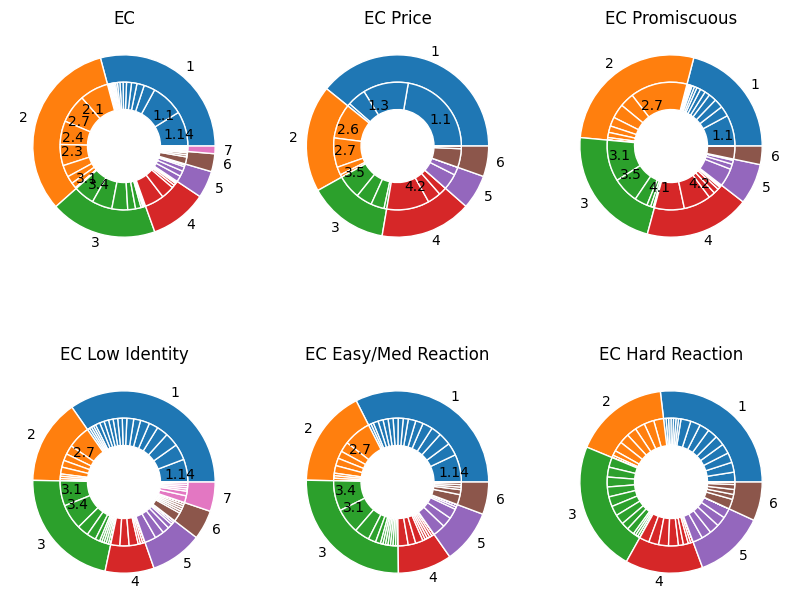

In [80]:
fig, axs = plt.subplots(2, 3, figsize=(10, 8))

for index, title in enumerate(['EC', 'EC Price', 'EC Promiscuous', 'EC Low Identity', 'EC Easy/Med Reaction', 'EC Hard Reaction']):

    df = pd.DataFrame()
    if index == 0:
        df['EC'] = swissprot['EC number'].unique()
    if index == 1:
        df['EC'] = price['EC number']
    elif index == 2:
        df['EC'] = promiscuous.explode('EC number')['EC number']
    elif index == 3:
        df['EC'] = isolated30['EC number']
    elif index == 4:
        df['EC'] = easy_medium_test['EC number']
    elif index == 5:
        df['EC'] = hard_test['EC number']

    df['EC1'] = df['EC'].str.split('.').str[0]
    df['EC2'] = df['EC'].str.split('.').str[:2].str.join('.')

    distribution = [list(df[df['EC1'] == ec]['EC2'].value_counts().values) for ec in np.sort(df['EC1'].unique())]
    level2_labels = [list(df[df['EC1'] == ec]['EC2'].value_counts().keys()) for ec in np.sort(df['EC1'].unique())]

    #concatenate zeros so that each list is the same length
    max_len = max([len(l) for l in distribution])
    for i, l in enumerate(distribution):
        distribution[i] = l + [0] * (max_len - len(l))
        level2_labels[i] = level2_labels[i] + [''] * (max_len - len(level2_labels[i]))
    #distribution

    sum = np.sum(np.sum(distribution))
    #replace level2 labels with an empty string if the corresponding entry in distribution is too small
    for i, l in enumerate(distribution):
        for j, count in enumerate(l):
            if count/sum < 0.05:
                level2_labels[i][j] = ''


    size = 0.3
    #vals = np.array([[1000., 32.], [37., 40.], [29., 10.]])
    vals = np.array(distribution)
    i = index // 3
    j = index % 3

    cmap = plt.colormaps["tab10"]
    #outer_colors = cmap(np.arange(vals.shape[0])*3.7)
    #inner_colors = cmap(np.arange(vals.shape[0]*vals.shape[1]))

    mylabels = np.arange(1, vals.shape[0]+1)

    outer_colors = sns.color_palette("tab10", vals.shape[0])
    axs[i, j].pie(vals.sum(axis=1), radius=1, colors=outer_colors,
        wedgeprops=dict(width=size, edgecolor='w'), labels=mylabels)
    #repeat the outer colors as the inner colors
    inner_colors = []
    for k in range(vals.shape[0]):
        inner_colors = inner_colors + [outer_colors[k]] * vals.shape[1]


    axs[i, j].pie(vals.flatten(), radius=1-size, colors=inner_colors,
        wedgeprops=dict(width=size, edgecolor='w'), labels=np.array(level2_labels).flatten(), labeldistance=0.65, )

    axs[i, j].set(aspect="equal", title=title)
plt.show()

### For initial testing

In [20]:
import pandas as pd
processed = pd.read_csv('../processed_data/protein2EC.csv')
aggregated = processed.groupby('Sequence').agg({'EC number': lambda x: list(x)}).reset_index()
#map back to the Entry as well
aggregated['Entry'] = aggregated['Sequence'].map(processed.drop_duplicates('Sequence').set_index('Sequence')['Entry'])
aggregated['EC number'] = aggregated['EC number'].apply(lambda x: ';'.join(x))
aggregated = aggregated[['Entry', 'EC number', 'Sequence']]
aggregated.to_csv('../processed_data/protein2EC_train.csv', index=False, sep='\t')

In [21]:
price = pd.read_csv('../splits/task1/price_protein_test.csv')
price.to_csv('../splits/task1/price_protein_test.csv', index=False, sep='\t')